<a href="https://colab.research.google.com/github/jiayuanteng/Hands_on_ML2/blob/main/8_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curse of dimensionality
If you pick two points randomly in a unit square, the distance between these two points will be, on average, roughly 0.52. If you pick two random points in a unit 3D cube, the average distance will be roughly 0.66. But what about two points picked randomly in a 1,000,000-dimensional hypercube? The average distance, believe it or not, will be about 408.25. 

High-dimensional datasets are at risk of being very sparse: most training instances are likely to be far away from each other.

This also means that a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations. In short, the more dimensions the training set has, the greater the risk of overfitting it.



# Approaches for dimensionality reduction
## Principal component analysis (PCA)
PCA identifies the axis that accouts for the largest amount of variance in the training set. It is reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projection. Another way to justify this choice is that it is the axis that minimizes the mean squared distance betweeen the original dataset and its projection onto that axis. 

1. The *first* principal component direction of the data is that along which the observations *vary the most*. The first principal component vector defines the line that is as close as possible to the data.
2. The *second* principal component is arthogonal to the first one, and accounts for the largest amount of remaining variance. 

Suppose there are m features and n training instances, the first principal component is
$Z_1 = [λ_1, λ_2, ⋯, λ_m] X$
where X is a zero-centered matrix (X is demeaned)

$ X = 
\begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,n}\\
\vdots  & \vdots  & \ddots & \vdots \\ 
x_{m,1} & x_{m,2} & \cdots & x_{m,n}
\end{pmatrix} 
$



In [11]:
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [12]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [13]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

# project down to d dimensions
W2 = Vt.T[:, :2]
X2D_using_svd = X_centered.dot(W2)

## Using Scikit-Learn
1. Code takes care of mean centering
2. *explained_variance_ratio_* reports the proportion of the dataset's variance that lies along each principal component. 
3. Choose the right number of dimensions by defining a sufficiently large portion of the variance explained by the number of dimensions

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [10]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [14]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [16]:
pca.explained_variance_ratio_

print("projecting to lower dimentions loses {:.2%} of variance".format(1 - pca.explained_variance_ratio_.sum()))

projecting to lower dimentions loses 1.12% of variance


In [19]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)


X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [20]:
# or run the following to use the right number of PCs
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

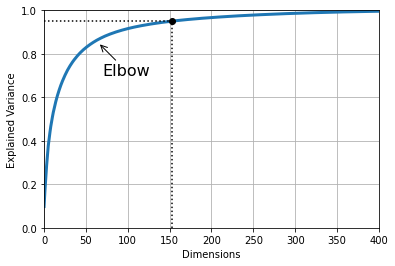

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [23]:
cumsum

array([0.09792858, 0.16918255, 0.23058781, 0.28488202, 0.33394139,
       0.37697755, 0.40965576, 0.43855474, 0.46609225, 0.48952161,
       0.51047203, 0.5308378 , 0.54786123, 0.56475213, 0.5806216 ,
       0.5954588 , 0.60867273, 0.6214041 , 0.63328935, 0.64482663,
       0.65548608, 0.6656263 , 0.67523811, 0.68437167, 0.69322418,
       0.70162074, 0.70970978, 0.71757011, 0.7249473 , 0.73182003,
       0.73834683, 0.74479121, 0.7508099 , 0.75671383, 0.76238186,
       0.76783612, 0.77286595, 0.77773048, 0.78251842, 0.78719169,
       0.79174491, 0.79619636, 0.80036573, 0.8043255 , 0.80815976,
       0.81190639, 0.81551796, 0.81899999, 0.8223805 , 0.82558925,
       0.82876061, 0.83185067, 0.83483074, 0.83769869, 0.84052413,
       0.84321858, 0.84590974, 0.84848407, 0.85102041, 0.85345062,
       0.85585449, 0.85823931, 0.86052105, 0.86273756, 0.86485904,
       0.86693298, 0.86895776, 0.87091498, 0.87282984, 0.87472256,
       0.87658385, 0.87836792, 0.8801357 , 0.88186572, 0.88350